In [1]:
import pandas as pd
import os
import ast
import seaborn as sns
import numpy as np
import random
from matplotlib import pyplot as plt
from tabulate import tabulate

from load_data import *
from analysis import *
from main import *

ModuleNotFoundError: No module named 'tabulate'

In [ ]:
review_df = pd.read_csv('data/review_df.csv')
review_metadata_df = pd.read_csv('data/review_metadata_df.csv')

In [ ]:
review_df.head()

In [4]:
review_metadata_df.head()

,Unnamed: 0,asin,salesRank,title,productDescriptionLength,price,bought_together,brand,category
0,0,B00004SR8Z,1631.0,Lewis N. Clark Deluxe Neck Stash,0,12.80,NaN,Lewis N. Clark,Clothing
1,1,B0000ZE74A,4742.0,Vanity Fair Women's Lollipop Plus Size Cuff Le...,0,NaN,"['B004PEHJ6U', 'B004A7XXJO', 'B0007YY8H0', 'B0...",NaN,Clothing
2,2,B00012O12A,4.0,Levi's Men's 505 Regular-Fit Jean,0,NaN,NaN,NaN,Clothing
3,3,B0002XSXWC,300.0,Columbia Men's Bonehead Short Sleeve Fishing S...,0,NaN,"['B0031RFWMU', 'B0031RFWSE', 'B0050VLSLO', 'B0...",NaN,Clothing
4,4,B00066TWMU,1199.0,ASICS Mesh Backpack,0,12.41,"['B00KOWEIAW', 'B00G3K71KS', 'B00CR60HLM', 'B0...",ASICS,Clothing


# Q1: What is the relation between the reviews and the helpfulness?

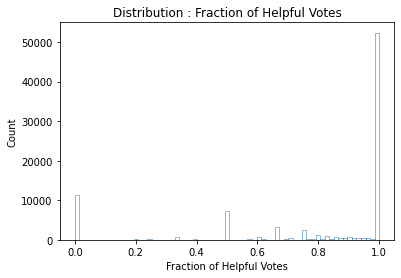

In [5]:
plot_histogram(None, review_df, HELPFULNESS)

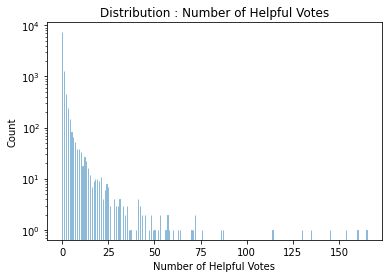

In [6]:
plot_histogram(None, review_df, NUM_HELPFUL, log=True, max_samples=10000)

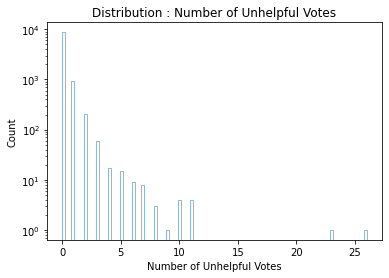

In [7]:
plot_histogram(None, review_df, NUM_UNHELPFUL, log=True, max_samples=10000, bins=100)

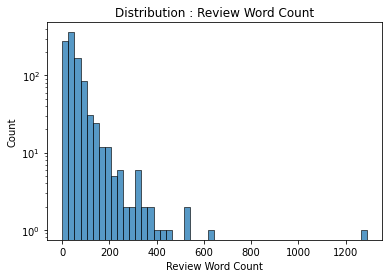

In [8]:
plot_histogram(None, review_df, REVIEW_WORD_COUNT, log=True, fill=True, max_samples=1000, bins=50)

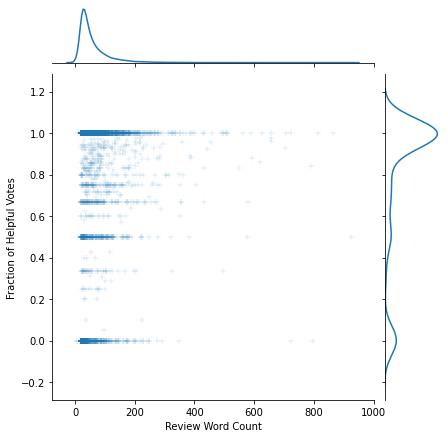

In [9]:
joint_plot(None, review_df, REVIEW_WORD_COUNT, HELPFULNESS, alpha=0.25, max_samples=10000)
# plt.xlabel('sabyk')

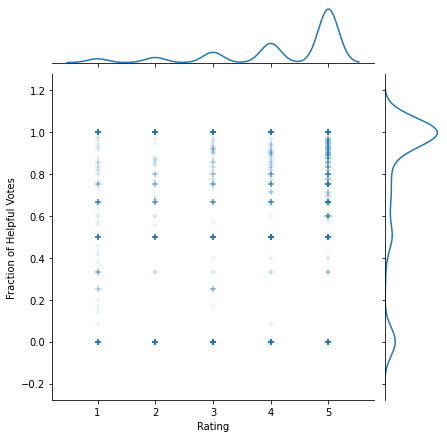

In [10]:
joint_plot(None, review_df, RATING, HELPFULNESS, max_samples=10000, alpha=0.25)

In [11]:
# sns.regplot(RATING, HELPFULNESS, data=review_df)

In [12]:
print_correlation(review_df, HELPFULNESS, RATING, "helpfulness", "rating")
print_correlation(review_df, HELPFULNESS, REVIEW_WORD_COUNT, "helpfulness", "review word count")
print_correlation(review_df, HELPFULNESS, SUMMARY_LENGTH, "helpfulness", "summary length")

Correlation between helpfulness and rating = 18.1%
Correlation between helpfulness and review word count = 5.4%
Correlation between helpfulness and summary length = -0.1%


<AxesSubplot:xlabel='overall', ylabel='helpful'>

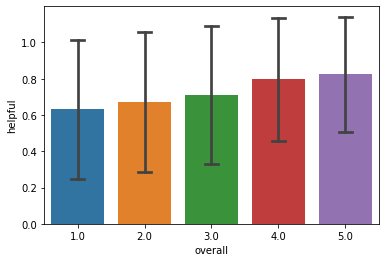

In [13]:
sns.barplot(x=RATING, y=HELPFULNESS, data=review_df, ci='sd', capsize=.2)

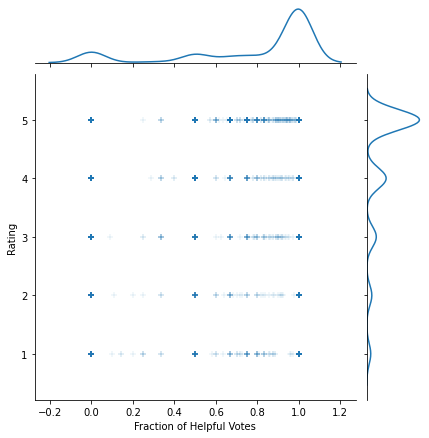

In [14]:
joint_plot(None, review_df, HELPFULNESS, RATING, 10000, alpha=0.25)

# Q2: What is the review behavior among different categories?

In [15]:
joined_df = review_df.set_index(PRODUCT_ID).join(review_metadata_df.set_index(PRODUCT_ID), 
                                                 lsuffix='', rsuffix='_right').reset_index()
review_df.shape, review_metadata_df.shape, joined_df.shape

((278677, 16), (23033, 9), (278677, 24))

/home/asharma/Personal/Shabana/takeaway/main.py:20: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_df.columns = ["_".join(x) for x in grouped_df.columns.ravel()]
/home/asharma/anaconda3/envs/develop/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


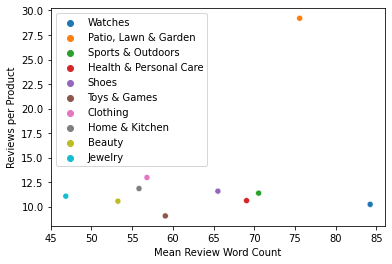

In [16]:
metric = REVIEW_WORD_COUNT

review_by_category_df = review_behavior_by_category(joined_df, metric)
# TODO: scatterplot
sns.scatterplot(f'{metric}_mean', 
                'reviews_per_product', 
                data=review_by_category_df, 
                hue=CATEGORY)
plt.legend(loc='upper left')
plt.xlabel(get_label(f'{metric}_mean'))
plt.ylabel(get_label('Reviews per Product'))
plt.show()

In [17]:
review_by_category_df

,category,reviewTextLength_mean,reviewTextLength_count,asin_nunique,reviews_per_product
0,Watches,84.232933,10166,993,10.237664
1,"Patio, Lawn & Garden",75.574775,555,19,29.210526
2,Sports & Outdoors,70.531464,8311,730,11.384932
3,Health & Personal Care,69.048563,1009,95,10.621053
4,Shoes,65.527008,69238,5975,11.587950
5,Toys & Games,59.071009,2211,244,9.061475
6,Clothing,56.815509,139752,10768,12.978455
7,Home & Kitchen,55.839336,2110,178,11.853933
8,Beauty,53.248000,750,71,10.563380
9,Jewelry,46.845163,29179,2635,11.073624


/home/asharma/anaconda3/envs/develop/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


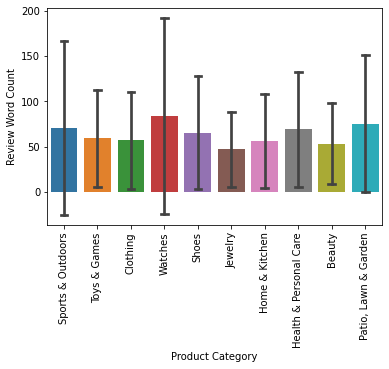

In [18]:
### TODO: add plot
top_categories = review_by_category_df[CATEGORY].tolist()
filtered_df = joined_df[joined_df[CATEGORY].isin(top_categories)]
sns.barplot(CATEGORY, metric, data=filtered_df, ci='sd', capsize=.2)
# sns.boxplot(CATEGORY, metric, data=filtered_df)

plt.xticks(rotation=90)
plt.xlabel(get_label(CATEGORY))
plt.ylabel(get_label(metric))
plt.show()

# Q3: Is there a relationship between price and reviews?

In [19]:
# # correlation per-review
# print_correlation(joined_df[[REVIEW_WORD_COUNT, PRICE]], PRICE, REVIEW_WORD_COUNT, 'Price', 'Review Word Count')
# print_correlation(joined_df[[RATING, PRICE]], PRICE, RATING, 'Price', 'Rating')

# correlation per-product
product_price_wordcount_df = get_average_metric_with_price(review_df, review_metadata_df, REVIEW_WORD_COUNT)
print_correlation(product_price_wordcount_df, 
                  PRICE, f'{REVIEW_WORD_COUNT}_mean',
                  'Price', 'Mean Review Word Count')

product_price_rating_df = get_average_metric_with_price(review_df, review_metadata_df, RATING)
print_correlation(product_price_rating_df, 
                  PRICE, f'{RATING}_mean',
                  'Price', 'Mean Rating')

Correlation between Price and Mean Review Word Count = 40.9%
Correlation between Price and Mean Rating = 9.9%


/home/asharma/Personal/Shabana/takeaway/main.py:38: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  product_metric_df.columns = ["_".join(x) for x in product_metric_df.columns.ravel()]


In [20]:
# joint_plot(None, product_price_wordcount_df, PRICE, f'{REVIEW_WORD_COUNT}_mean', 250, alpha=0.25)

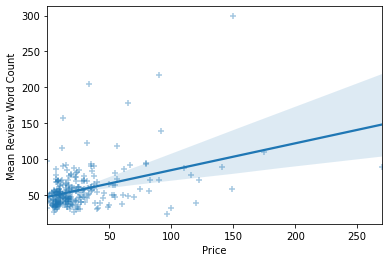

In [21]:
sns.regplot(data=product_price_wordcount_df.sample(250), x=PRICE, y=f'{REVIEW_WORD_COUNT}_mean', marker='+', scatter_kws={'alpha':0.4})
plt.xlabel(get_label(PRICE))
plt.ylabel(get_label(f'{REVIEW_WORD_COUNT}_mean'))
plt.show()

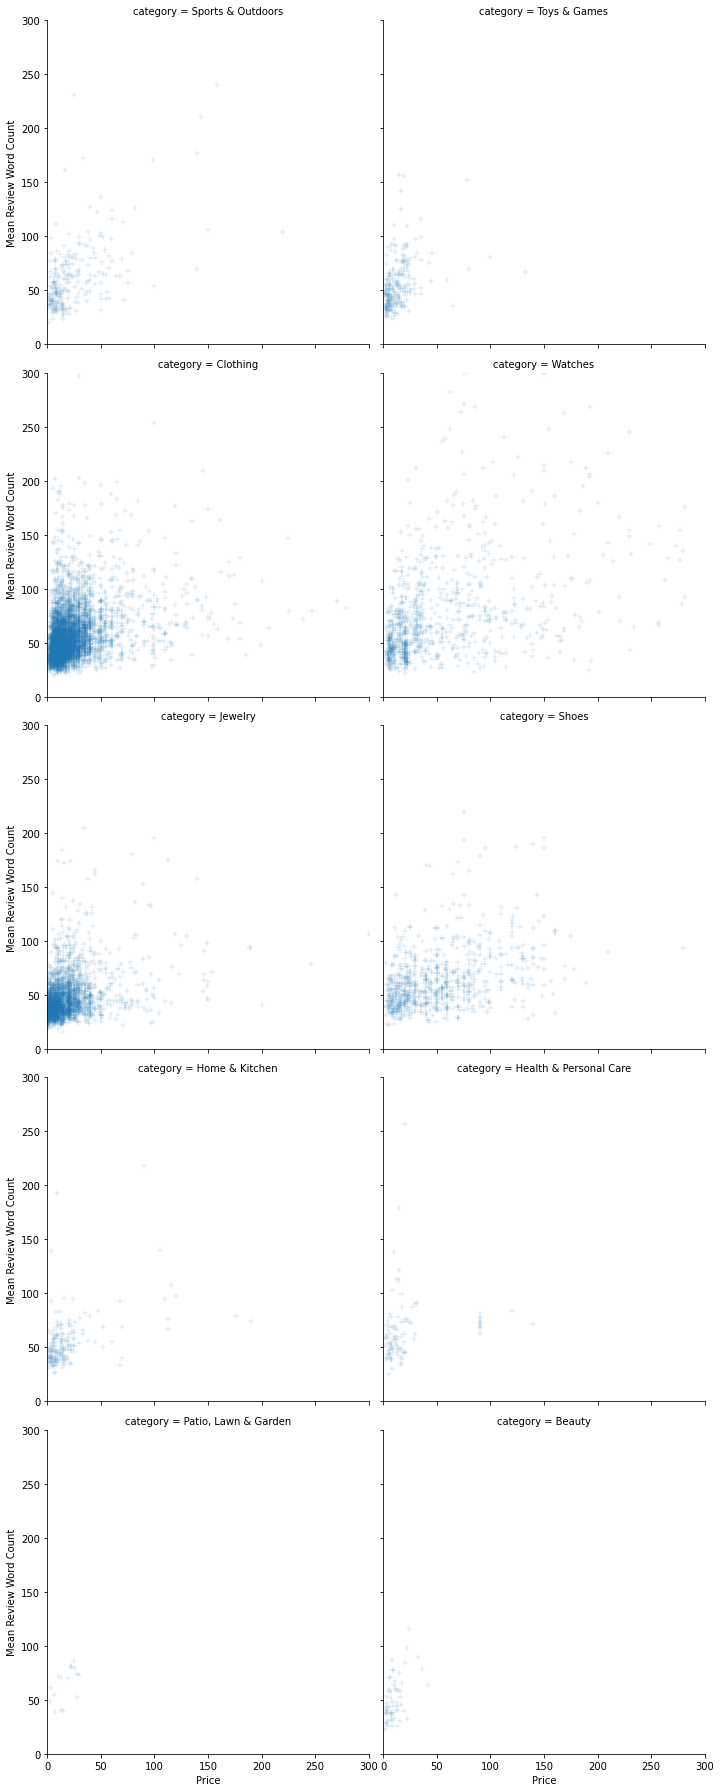

In [22]:
filtered_df = product_price_wordcount_df[product_price_wordcount_df[CATEGORY].isin(top_categories)]

g = sns.FacetGrid(filtered_df, col=CATEGORY, height=5, col_wrap=2)
g.map(sns.scatterplot, PRICE, f'{REVIEW_WORD_COUNT}_mean', marker='+', alpha=0.3)
g.set_axis_labels(get_label(PRICE), get_label(f'{REVIEW_WORD_COUNT}_mean'))
plt.xlim(0,300)
plt.ylim(0,300)
plt.show()

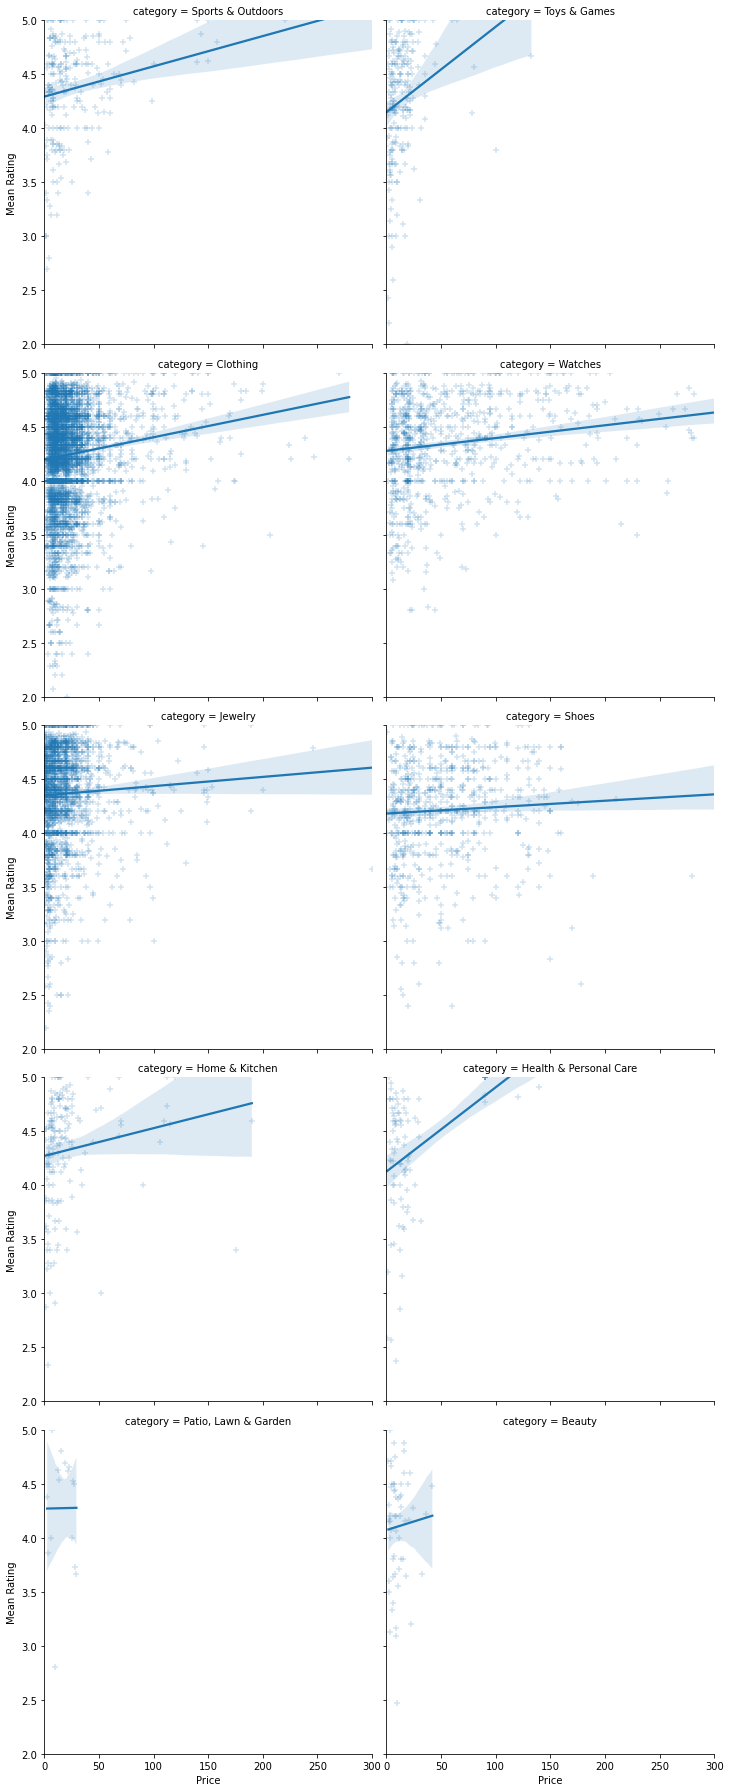

In [23]:
filtered_df = product_price_rating_df[product_price_rating_df[CATEGORY].isin(top_categories)]

g = sns.FacetGrid(filtered_df, col=CATEGORY, height=5, col_wrap=2)
g.map(sns.regplot, PRICE, f'{RATING}_mean', marker='+', scatter_kws={'alpha':0.2})
g.set_axis_labels(get_label(PRICE), get_label(f'{RATING}_mean'))
plt.xlim(0,300)
plt.ylim(2,5)
plt.show()

# Q4: Which group of reviewers is more valuable to the business?

In [24]:
# reviewer_summary_df = review_df.groupby([REVIEWER_ID, REVIEWER_NAME]) \
#         .agg({NUM_HELPFUL: ['sum'], NUM_UNHELPFUL: ['sum'], PRODUCT_ID: ['count']})

# reviewer_summary_df.columns = ["_".join(x) for x in reviewer_summary_df.columns.ravel()]
# reviewer_summary_df['net_helpfulness'] = reviewer_summary_df[f'{NUM_HELPFUL}_sum'] - reviewer_summary_df[f'{NUM_UNHELPFUL}_sum']

In [25]:
# reviewer_summary_df.sort_values('net_helpfulness', ascending=False).head(10)

In [26]:
reviewer_summary_df = joined_df.groupby([REVIEWER_ID, REVIEWER_NAME]) \
        .agg({PRICE: ['mean'], PRODUCT_ID: ['count']})

reviewer_summary_df.columns = ["_".join(x) for x in reviewer_summary_df.columns.ravel()]

/home/asharma/anaconda3/envs/develop/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  after removing the cwd from sys.path.


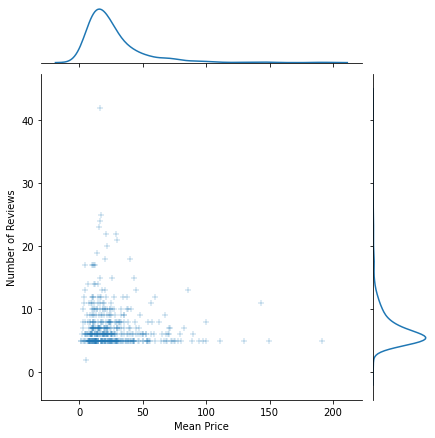

In [27]:
reviewer_summary_df['Number of Reviews'] = reviewer_summary_df[f'{PRODUCT_ID}_count']
joint_plot(None, reviewer_summary_df, f'{PRICE}_mean', 'Number of Reviews', max_samples=500, alpha=0.6)

In [28]:
# print_correlation(reviewer_summary_df, f'{PRICE}_mean', f'{PRODUCT_ID}_count', 
#                   f'{PRICE}_mean', f'{PRODUCT_ID}_count')

# Q5: Is there a relation between reviews from products which are bought together?

In [29]:
rating_pair_df = sample_products_bought_together(review_df, review_metadata_df, num_samples=1000)
print_correlation(rating_pair_df, 'Rating_1', 'Rating_2', 'Rating_1', 'Rating_2')

/home/asharma/Personal/Shabana/takeaway/main.py:62: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  product_rating_df.columns = ["_".join(x) for x in product_rating_df.columns.ravel()]


Correlation between Rating_1 and Rating_2 = 28.3%


In [30]:
rating_pair_df.head(10)

,Product_ID_1,Rating_1,Product_ID_2,Rating_2
0,B00DHKYE52,3.200000,B00DHKL51I,3.571429
1,B008E3CCF6,4.447368,B00A97X6Y6,4.555556
2,B003U7BK90,3.833333,B003U7CXBY,4.454545
3,B001UL8SJS,4.750000,B006P4NDFE,4.428571
4,B002AQSQ76,4.714286,B004UDMETS,3.900000
5,B006TQLRL0,4.357143,B006TQLR42,3.375000
6,B004VMOSWE,4.375000,B0052OPAM2,4.250000
7,B00EQ81GKA,4.833333,B005EOIQRQ,4.538462
8,B007JZ983Y,5.000000,B005H0JHM0,5.000000
9,B0074ZVIX2,4.181818,B00E924N9O,4.200000


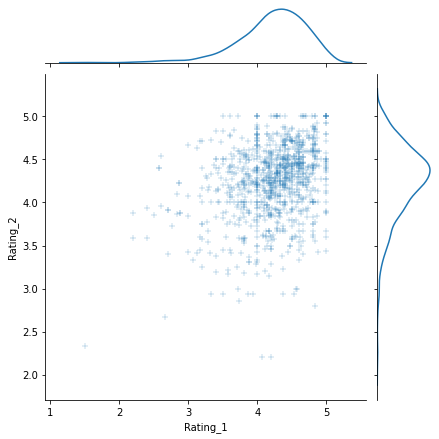

In [31]:
joint_plot(None, rating_pair_df, 'Rating_1', 'Rating_2', max_samples=1000, alpha=0.5)

# Q6: Temporal analysis of reviews

In [32]:
YEAR = 'year'
time_joined_df = review_df.set_index(PRODUCT_ID).join(review_metadata_df.set_index(PRODUCT_ID), 
                                                 lsuffix='', rsuffix='_right').reset_index()

In [33]:
# filtered_df = time_joined_df[time_joined_df[CATEGORY]=='Clothing']
# rating_df = filtered_df[[YEAR, PRODUCT_ID, RATING]].groupby([YEAR, PRODUCT_ID]).mean(RATING).reset_index()

In [34]:
# rating_df = rating_df.groupby([YEAR]).mean(RATING).reset_index()

In [35]:
# sns.lineplot(data=rating_df, x="year", y="overall")


In [36]:
# top_3_categories = ['Clothing', 'Shoes', 'Jewelry']
# filtered_df = time_joined_df[time_joined_df[CATEGORY].isin(top_3_categories)]
# rating_df = filtered_df[[YEAR, CATEGORY, PRODUCT_ID, RATING]].groupby([YEAR, CATEGORY, PRODUCT_ID]).mean(RATING).reset_index()
# g = sns.FacetGrid(rating_df, col=CATEGORY, height=5, col_wrap=1)
# g.map(sns.lineplot, YEAR, RATING)

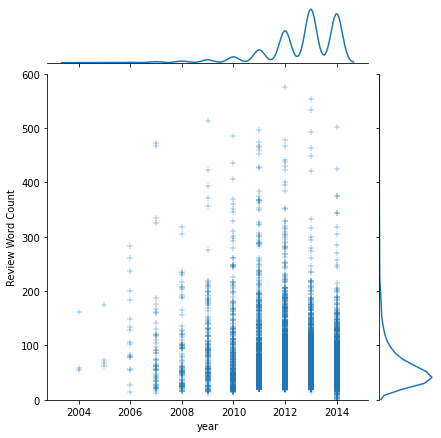

In [37]:
metric = REVIEW_WORD_COUNT
rating_df = time_joined_df[[YEAR, PRODUCT_ID, metric]].groupby([YEAR, PRODUCT_ID]).mean(metric).reset_index()
joint_plot(None, rating_df, YEAR, metric, alpha=0.75, max_samples=10000)
plt.ylim(0, 600)
plt.show()

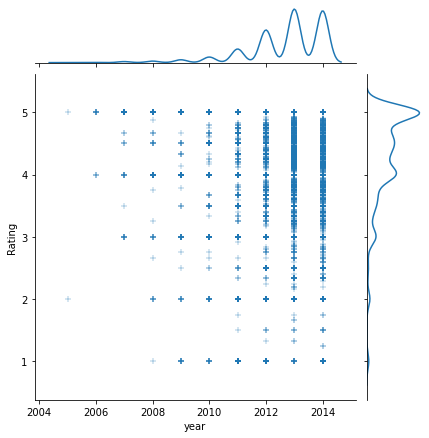

In [38]:
metric = RATING
rating_df = time_joined_df[[YEAR, PRODUCT_ID, metric]].groupby([YEAR, PRODUCT_ID]).mean(metric).reset_index()
joint_plot(None, rating_df, YEAR, metric, alpha=0.75, max_samples=10000)
plt.show()

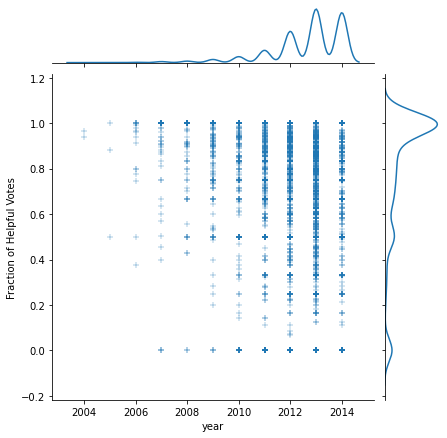

In [39]:
metric = HELPFULNESS
rating_df = time_joined_df[[YEAR, PRODUCT_ID, metric]].groupby([YEAR, PRODUCT_ID]).mean(metric).reset_index()
joint_plot(None, rating_df, YEAR, metric, alpha=0.75, max_samples=10000)
plt.show()